## Projet sur la performance des étudiants

### Importation des bibliothèques

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.inspection import PartialDependenceDisplay
from xgboost import XGBRegressor
import xgboost as xgb


### Charger le fichier

In [289]:
df = pd.read_csv('Student_performance_data _.csv')
print(df.head())

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

### Manipulation des données (prévisualisation)

In [290]:
# Regarder les valeurs manquantes
print(df.isnull().sum())

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [291]:
# Regarder les valeurs dupliquées
print(df.duplicated().sum())

0


In [292]:
# Regarder les valeurs uniques de chaque colonne
for col in df.columns:
    print(col, df[col].unique())

StudentID [1001 1002 1003 ... 3390 3391 3392]
Age [17 18 15 16]
Gender [1 0]
Ethnicity [0 2 1 3]
ParentalEducation [2 1 3 4 0]
StudyTimeWeekly [19.83372281 15.40875606  4.21056977 ...  6.80549964 12.41665266
 17.81990749]
Absences [ 7  0 26 14 17 10 22  1 11 15 21  9 16 29  2 25 20  5  8 12 27 23  3 13
  6 28  4 18 19 24]
Tutoring [1 0]
ParentalSupport [2 1 3 4 0]
Extracurricular [0 1]
Sports [0 1]
Music [1 0]
Volunteering [0 1]
GPA [2.92919559 3.04291483 0.11260225 ... 1.14233288 1.80329676 2.14001388]
GradeClass [2. 1. 4. 3. 0.]


In [293]:
# Explorer la valeur min et max de chaque colonne
print(df.describe())

         StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971         1.122813   
min

### Visualisation des données

array([[<Axes: title={'center': 'StudentID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Ethnicity'}>],
       [<Axes: title={'center': 'ParentalEducation'}>,
        <Axes: title={'center': 'StudyTimeWeekly'}>,
        <Axes: title={'center': 'Absences'}>,
        <Axes: title={'center': 'Tutoring'}>],
       [<Axes: title={'center': 'ParentalSupport'}>,
        <Axes: title={'center': 'Extracurricular'}>,
        <Axes: title={'center': 'Sports'}>,
        <Axes: title={'center': 'Music'}>],
       [<Axes: title={'center': 'Volunteering'}>,
        <Axes: title={'center': 'GPA'}>,
        <Axes: title={'center': 'GradeClass'}>, <Axes: >]], dtype=object)

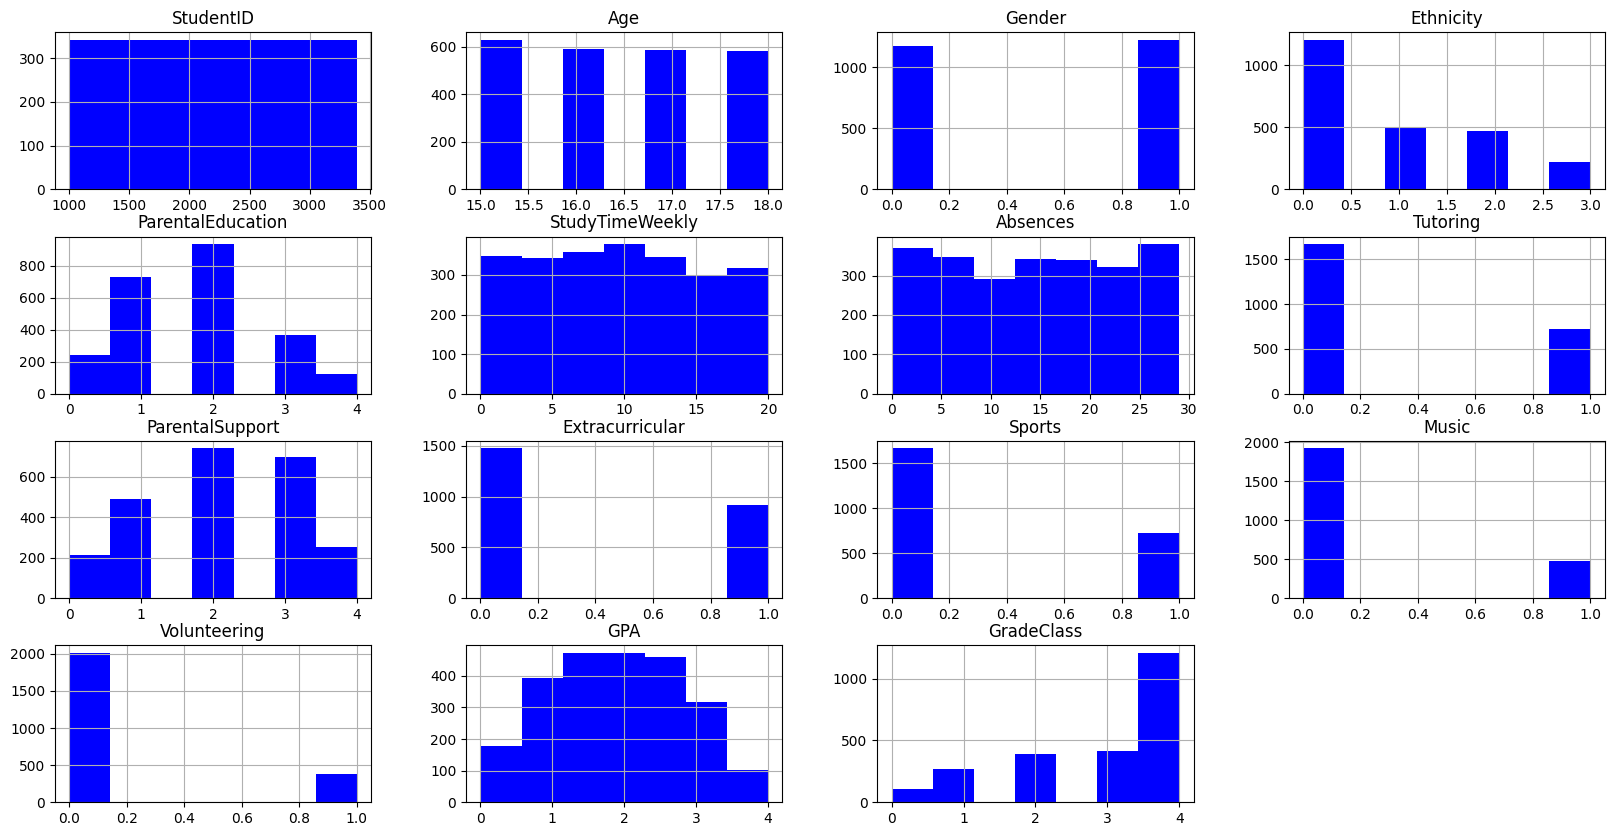

In [294]:
# Distribution of the variables
df.hist(figsize=(20,10),bins=7, color='blue')

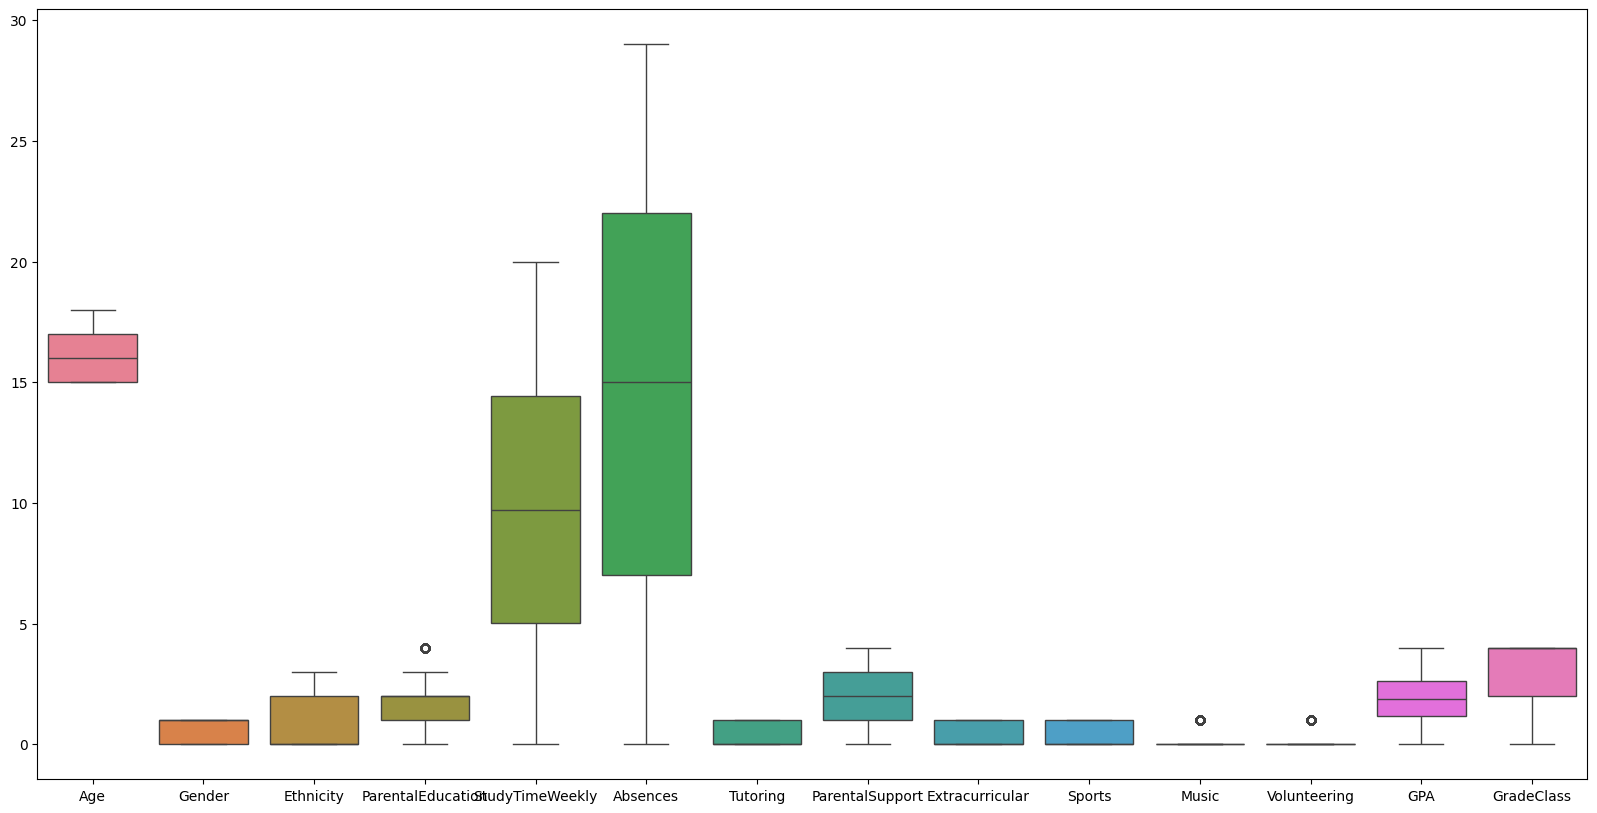

In [295]:
# Look for outliers outside of column studentID
plt.figure(figsize=(20, 10))
sns.boxplot(data=df.drop('StudentID', axis=1))
plt.show()

<Axes: >

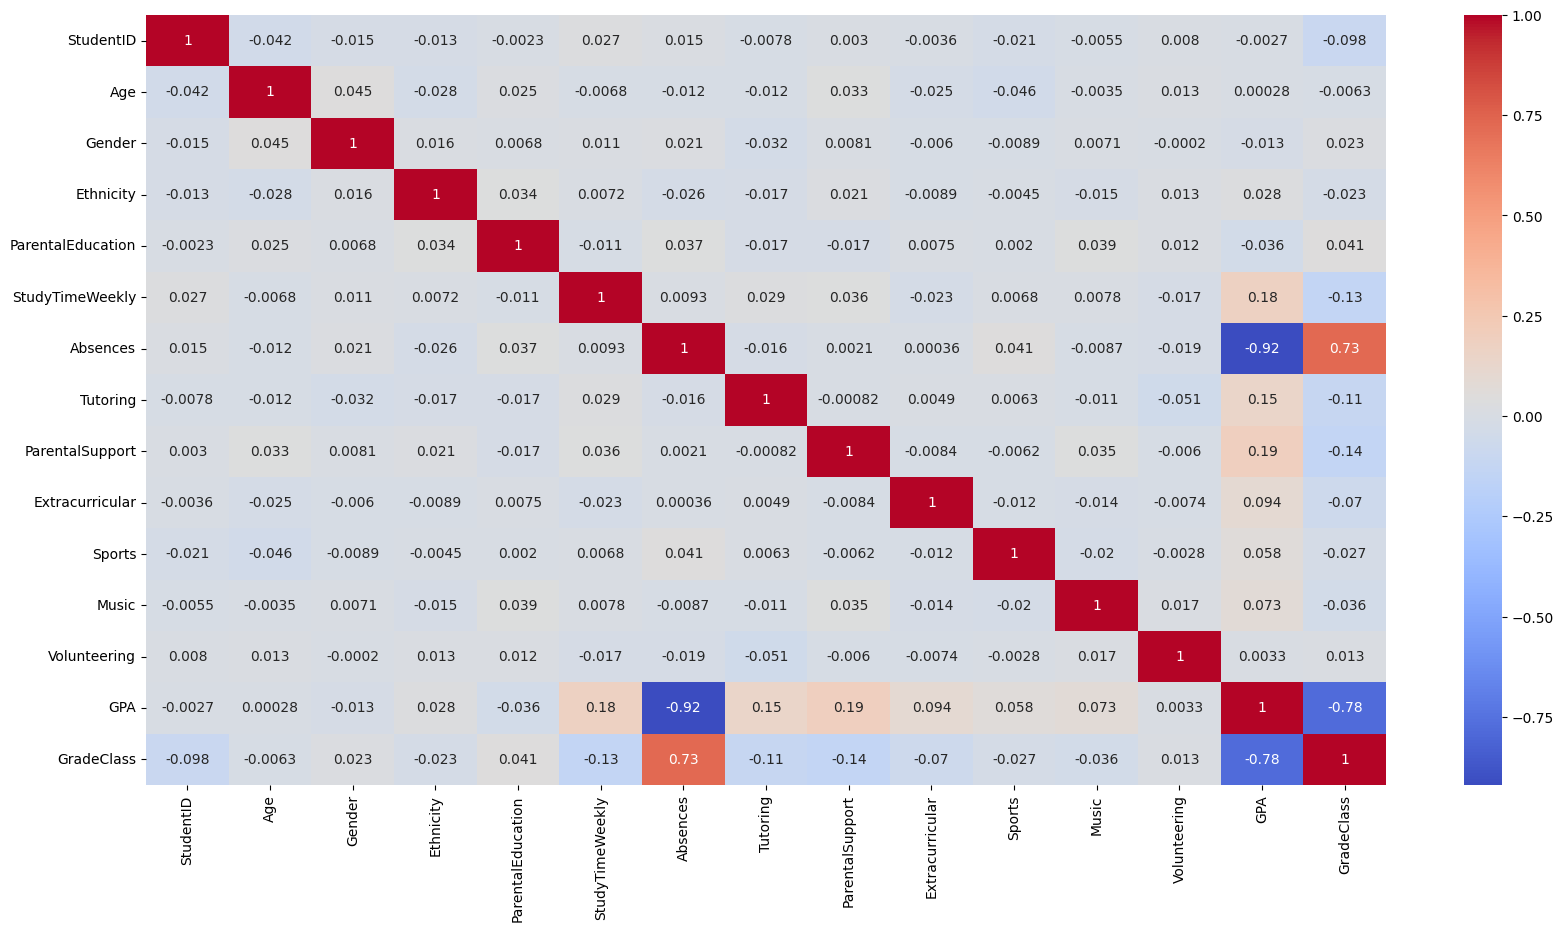

In [296]:
# Correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Manipulation des données (post-visualisation)

In [297]:
# Drop the StudentID column
df = df.drop('StudentID', axis=1)

# drop the GradeClass column
df_gpa = df.drop('GradeClass', axis=1)

# Transformation des variables catégorielles
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'Age']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Normalisation et Standardisation des variables numériques
numerical_columns = ['Age', 'StudyTimeWeekly', 'Absences']
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

standard_scaler = StandardScaler()
df[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])

# Splitting the dataset into independent and dependent variables
X = df_gpa.drop('GPA', axis=1)
y = df_gpa['GPA']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Construction et entrainement du modèle

In [298]:
# XGBoost Regression model
model = XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Prédictions

In [299]:
y_pred = model.predict(X_test)

### Évaluation et optimisation du modèle

In [300]:
print('Accuracy:', model.score(X_test, y_test))
print('Mean Absolute Error:', np.mean(np.abs(y_pred - y_test)))
print('Mean Squared Error:', np.mean((y_pred - y_test)**2))
print('Root Mean Squared Error:', np.sqrt(np.mean((y_pred - y_test)**2)))

Accuracy: 0.9293871219997486
Mean Absolute Error: 0.19138926037366433
Mean Squared Error: 0.05764569564139219
Root Mean Squared Error: 0.24009518037934913


#### Exploring Other Algorithms

In [302]:
## Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print('Random Forest Accuracy:', rf_model.score(X_test, y_test))
print('Random Forest Mean Absolute Error:', mean_absolute_error(y_test, y_pred_rf))
print('Random Forest Mean Squared Error:', mean_squared_error(y_test, y_pred_rf))
print('Random Forest Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest Accuracy: 0.929694611670164
Random Forest Mean Absolute Error: 0.19354839071265934
Random Forest Mean Squared Error: 0.05739467264876504
Random Forest Root Mean Squared Error: 0.23957185278902246


In [303]:
## Neural Network
nn_model = MLPRegressor(max_iter=1000)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
print('Neural Network Accuracy:', nn_model.score(X_test, y_test))
print('Neural Network Mean Absolute Error:', mean_absolute_error(y_test, y_pred_nn))
print('Neural Network Mean Squared Error:', mean_squared_error(y_test, y_pred_nn))
print('Neural Network Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_nn)))

Neural Network Accuracy: 0.9327028648278
Neural Network Mean Absolute Error: 0.18865512023341818
Neural Network Mean Squared Error: 0.05493884800532366
Neural Network Root Mean Squared Error: 0.2343903752403747


#### Optimisation des Hyperparamètres

In [301]:
## Affinement des Modèles
# Optimisation des Hyperparamètres : Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Predictions with the best model
y_pred_best = best_model.predict(X_test)

# Model Evaluation with the best model
print('Best Model Accuracy:', best_model.score(X_test, y_test))
print('Best Model Mean Absolute Error:', mean_absolute_error(y_test, y_pred_best))
print('Best Model Mean Squared Error:', mean_squared_error(y_test, y_pred_best))
print('Best Model Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_best)))

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Model Accuracy: 0.9457223455362416
Best Model Mean Absolute Error: 0.17035260296843172
Best Model Mean Squared Error: 0.044310234024667994
Best Model Root Mean Squared Error: 0.2104999620538398


#### Vérification des résidus

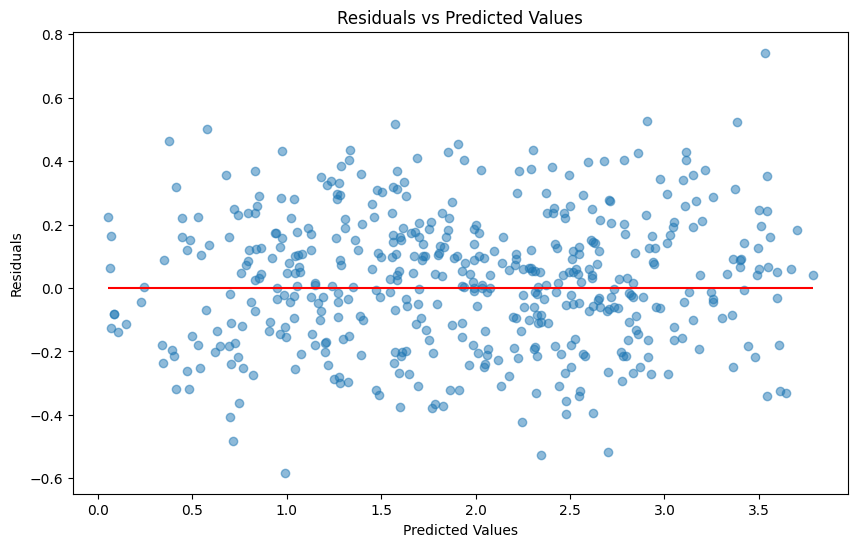

In [304]:
# Residual plot
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

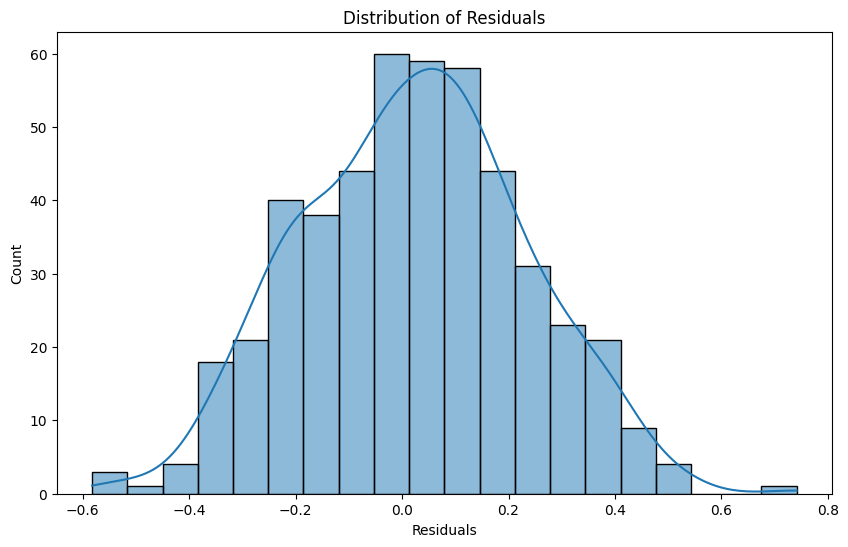

In [305]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=20, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

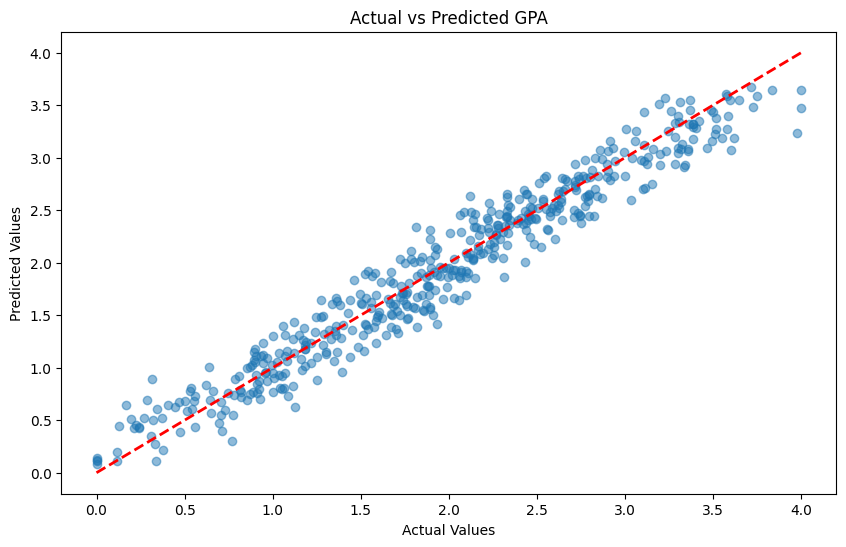

In [306]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted GPA')
plt.show()

#### Validation croisée

### Analyse de signifiance


<Figure size 1000x700 with 0 Axes>

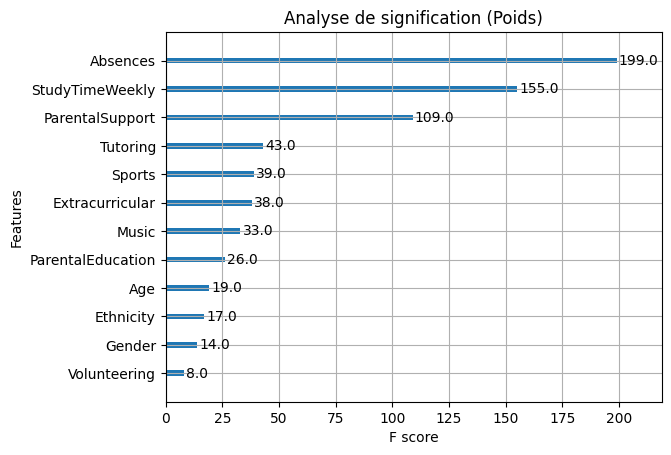

In [307]:
# Importance des variables (Poids)
plt.figure(figsize=(10, 7))
xgb.plot_importance(best_model, ax=plt.gca())
plt.title("Importance des variables (Poids)")
plt.show()


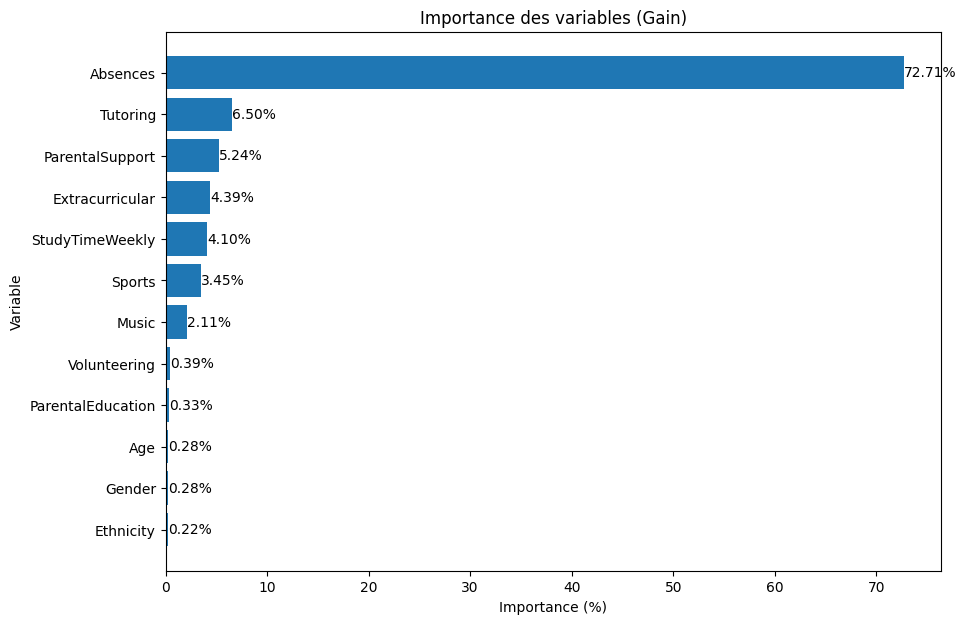

In [312]:
# Importance des variables (Gain)
# Calculate importances as a percentage of the total gain
importances = best_model.get_booster().get_score(importance_type='gain')
total_gain = sum(importances.values())
importances = {k: v / total_gain * 100 for k, v in importances.items()}

# Sort the importances
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

# Plotting
plt.figure(figsize=(10, 7))
plt.title("Importance des variables (Gain)")

# Bar plot
plt.barh(range(len(sorted_importances)), [imp[1] for imp in sorted_importances], align="center")
plt.yticks(range(len(sorted_importances)), [imp[0] for imp in sorted_importances])
plt.xlabel('Importance (%)')
plt.ylabel('Variable')
plt.gca().invert_yaxis()  # Invert y-axis to have the top value at the top

# Add value tags to the bars
for i, v in enumerate([imp[1] for imp in sorted_importances]):
    plt.text(v, i, f'{v:.2f}%', va='center')

plt.show()

# save % of importance of each feature
importances = pd.DataFrame(sorted_importances, columns=['Feature', 'Importance (%)'])
importances.to_csv('importances.csv', index=False)


<Figure size 1000x600 with 0 Axes>

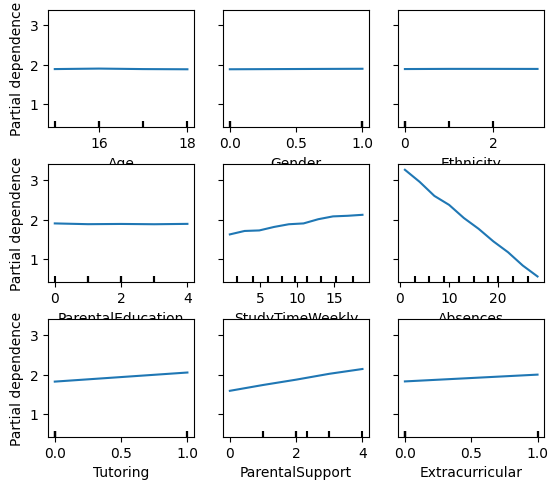

In [309]:
# Partial Dependence Plot
plt.figure(figsize=(10, 6))
disp = PartialDependenceDisplay.from_estimator(model, X_train, features=[0, 1, 2, 3, 4, 5, 6, 7, 8], grid_resolution=10)
plt.subplots_adjust(top=1, hspace=0.32)
plt.show()

In [310]:
# Définir la validation croisée (k-fold)
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Appliquer la validation croisée
cv_scores = cross_val_score(best_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Convertir les scores en valeurs positives (MSE)
cv_scores = -cv_scores

# Calculer les métriques de performance
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Mean CV MSE: {mean_cv_score:.4f}")
print(f"Standard Deviation of CV MSE: {std_cv_score:.4f}")

Mean CV MSE: 0.0574
Standard Deviation of CV MSE: 0.0062


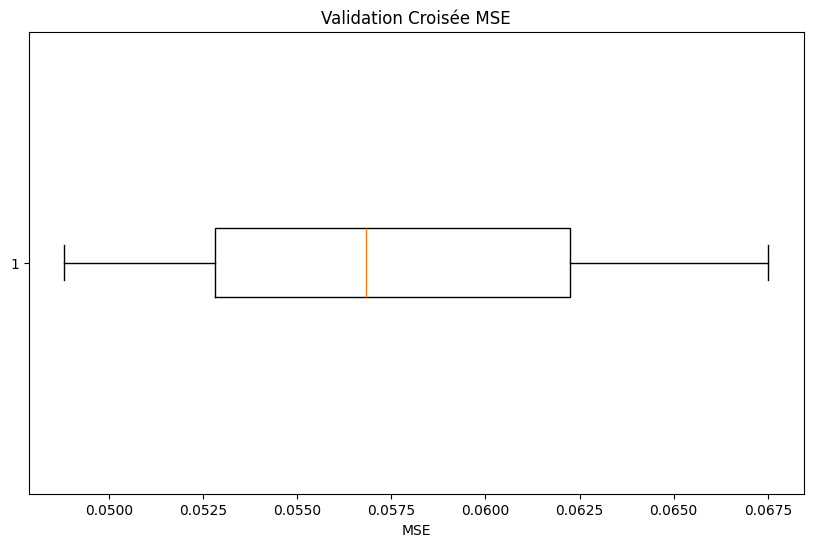

In [311]:
plt.figure(figsize=(10, 6))
plt.boxplot(cv_scores, vert=False)
plt.title('Validation Croisée MSE')
plt.xlabel('MSE')
plt.show()